# ---------------------TP.2 Classification supervisée----------------------
# Régression linéaire - K plus proches voisins – Bayésien naïf
### - MAAMIR MOHAMMED ERIFAI
### - GOUMEIDA AHMED SEYFEDDINE
# --------------------------------------------------------------------------------------
### 2 Données réelles (prostate) 
#### 2.1 Description des données prostate
Récupérer le jeu de données prostate, les Données examinent la corrélation entre le niveau de l'antigène spécifique de la prostate et un certain nombre de mesures cliniques chez les hommes qui étaient sur le point de recevoir une prostatectomie radicale. La variable lpsa est la réponse au traitement qui sera discrétiser en deux catégories ; high si lpsa > median(lpsa) et 0 sinon. On veut construire un score de détection de la réponse applicable aux patients. Pour chaque patient on a mesuré une batterie de critères et finalement p = 3 critères ( lcavol, lweight et age) ont étés retenus pour construire le score. 


##### A. Charger le jeu de données dans R, décrire le jeu de données prostate 

- Description de la table prostate 

In [79]:
library(ElemStatLearn)
data(prostate) 

- Information sur la table prostate 

In [80]:
?prostate 

- attacher la table prostate 

In [81]:
attach(prostate) 
prostate

The following object is masked _by_ .GlobalEnv:

    train

The following objects are masked from prostate (pos = 8):

    age, gleason, lbph, lcavol, lcp, lpsa, lweight, pgg45, svi, train



lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
-0.5798185,2.769459,50,-1.3862944,0,-1.38629436,6,0,-0.4307829,TRUE
-0.9942523,3.319626,58,-1.3862944,0,-1.38629436,6,0,-0.1625189,TRUE
-0.5108256,2.691243,74,-1.3862944,0,-1.38629436,7,20,-0.1625189,TRUE
-1.2039728,3.282789,58,-1.3862944,0,-1.38629436,6,0,-0.1625189,TRUE
0.7514161,3.432373,62,-1.3862944,0,-1.38629436,6,0,0.3715636,TRUE
-1.0498221,3.228826,50,-1.3862944,0,-1.38629436,6,0,0.7654678,TRUE
0.7371641,3.473518,64,0.6151856,0,-1.38629436,6,0,0.7654678,FALSE
0.6931472,3.539509,58,1.5368672,0,-1.38629436,6,0,0.8544153,TRUE
-0.7765288,3.539509,47,-1.3862944,0,-1.38629436,6,0,1.0473190,FALSE
0.2231436,3.244544,63,-1.3862944,0,-1.38629436,6,0,1.0473190,FALSE


- Binariser la réponse lpsa ; high si lpsa > median(lpsa) et 0 sinon

In [82]:
g <- factor(ifelse(lpsa > median(lpsa), "high", "low")) 
g

[1] low  low  low  low  low  low  low  low  low  low  low  low  low  low  low 
[16] low  low  low  low  low  low  low  low  low  low  low  low  low  low  low 
[31] low  low  low  low  low  low  low  low  low  low  low  low  low  low  low 
[46] low  low  low  low  low  high high high high high high high high high high
[61] high high high high high high high high high high high high high high high
[76] high high high high high high high high high high high high high high high
[91] high high high high high high high
Levels: high low

- utiliser les 3 variables explicatives lcavol,lweight and age pour modéliser les classes g et tracer le nuage des points de ces trois variables en indiquant les classes 

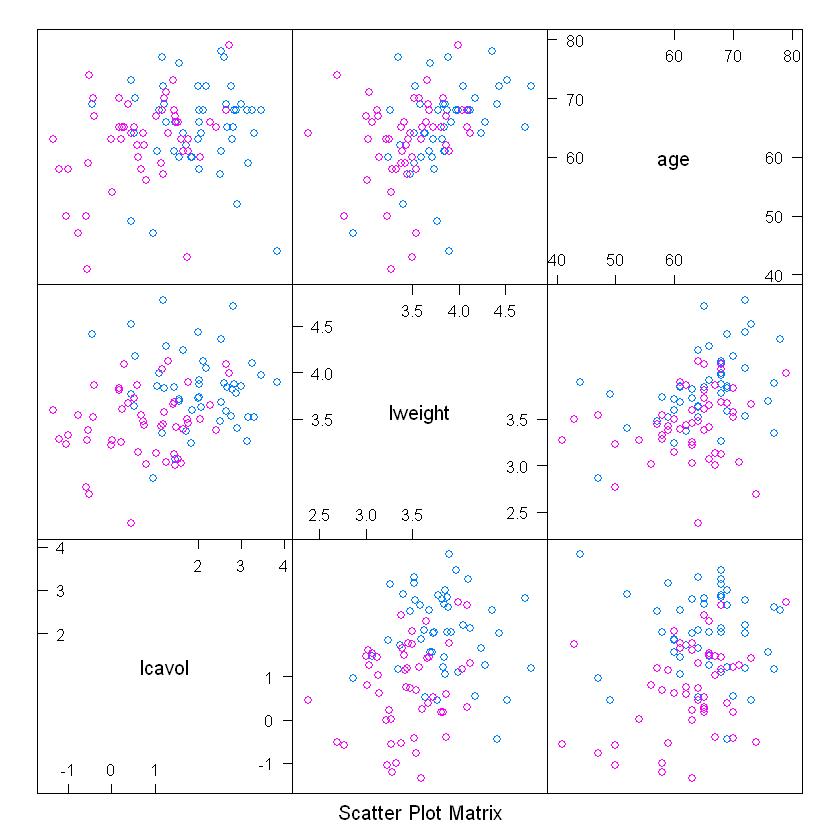

In [83]:
library(lattice) 
splom(~prostate[,1:3], groups=g) 

- Ou utiliser la fonction pairs 

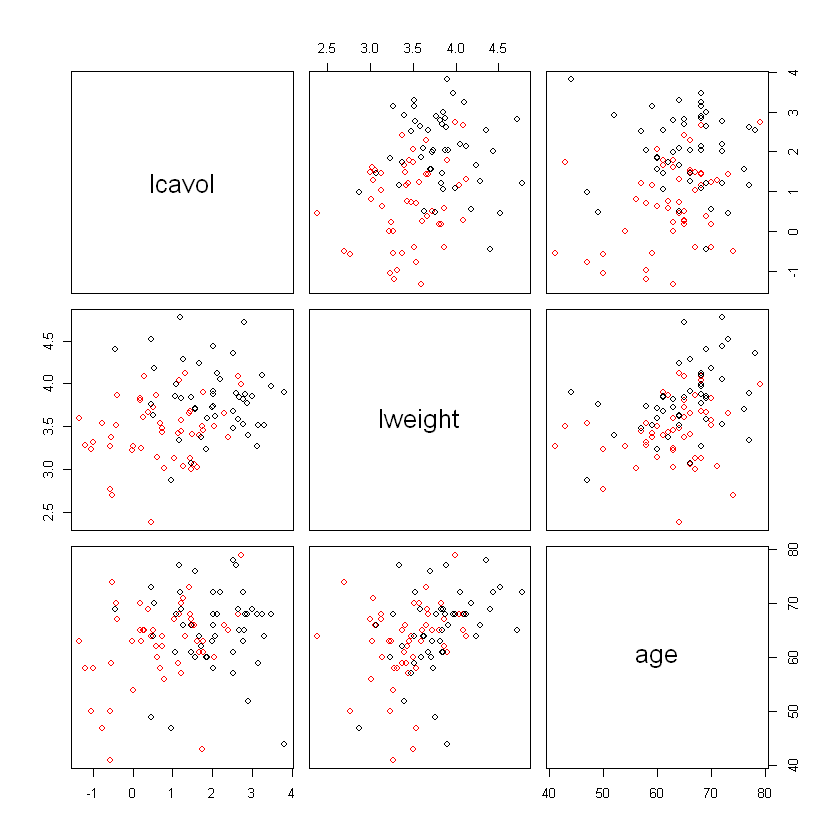

In [84]:
pairs(prostate[,1:3], col=as.numeric(g))

## 2.2 Régression linéaire 
### B. Pourquoi la régression linéaire n'est pas adaptée!? 
Parce que on est dans le cas d'une variable quantitative discrète("1","0"), qualitative ("high","low") 
qui reprèsente un cas de classification et non pas un cas de prédiction. 


- régression linéaire sur une variable indicatrice (binaire) 
- claculer le y binaire 

In [85]:
y <- ifelse(g=="high", 1, 0) 

- Calculer la régression linéaire 

In [86]:
lm.fit <- lm(y~lcavol+lweight+age) 
lm.fit


Call:
lm(formula = y ~ lcavol + lweight + age)

Coefficients:
(Intercept)       lcavol      lweight          age  
  -0.943045     0.200877     0.388765    -0.003984  


- coefficients de régrssion 

In [87]:
lm.beta <- lm.fit$coef 
lm.beta

(Intercept)       lcavol      lweight          age 
-0.943044969  0.200877054  0.388765006 -0.003983511

- tracer le modèle estimé lcavol et age pour lweight moyen 

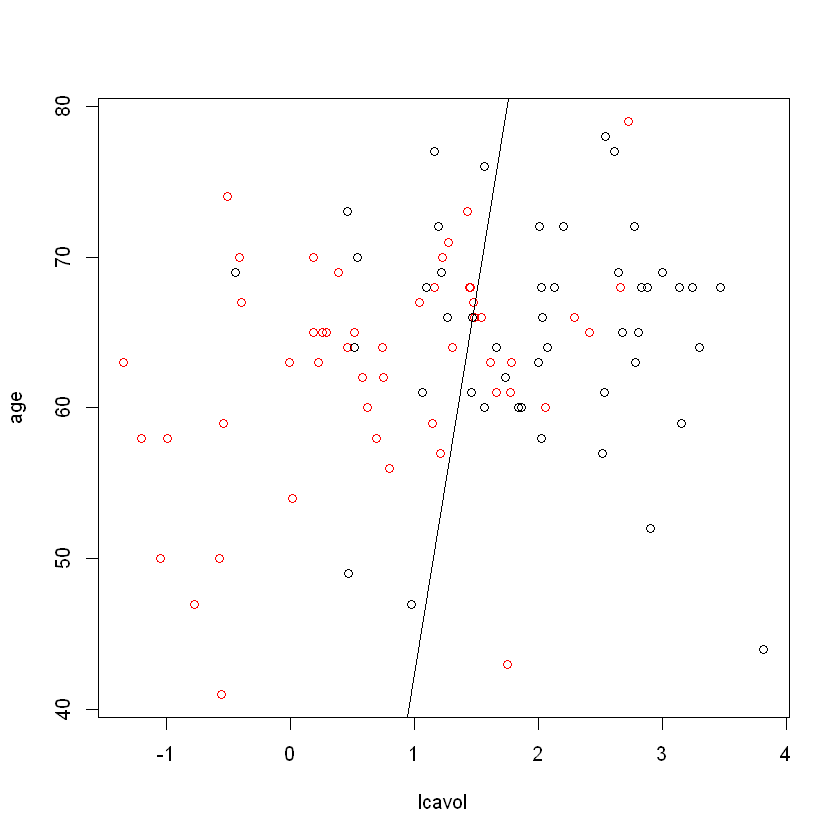

In [88]:
b <- -lm.beta[2]/lm.beta[4] 
a <- (0.5 - lm.beta[1] - lm.beta[3]*mean(lweight))/lm.beta[4] 
plot(lcavol, age, col=g) 
abline(a,b) 

- prédiction de y 

In [89]:
yhat <- predict(lm.fit) 

- prediction de la classe g 

In [90]:
lm.ghat <- factor(ifelse(yhat > 0.5, "high", "low")) 

- nombre dexemples mal classés 

In [91]:
sum(lm.ghat != g) 

[1] 19

- erreur de classification 

In [92]:
mean(lm.ghat != g) 

[1] 0.1958763

moyenne des éléments mal classés = taux d'erreur = 20%

- matrice de confusion 

In [93]:
table(lm.ghat, g)

       g
lm.ghat high low
   high   39  11
   low     8  39

en regardant la matrice de confusion on voit que :
   - 11 éléments high qui ont été classé low.
   - 8 éléments low qui ont été classé high.

## 2.3 KNN 

### C. On s’intéresse d’abord à la méthodologie du choix de k 



#### (1) Créer un jeu de données de données d’apprentissage (75% des données) et un jeu de données test (25% des données) avec le code suivant. 

In [146]:
set.seed(30) 
X=cbind(g, lcavol,lweight,age) 
tr <- sample(1:nrow(X),72) 
Xtrain <- X[tr,]
Xtest <- X[-tr,] 


#### (2) Calculer les taux d’erreur sur les données test pour k variant de 1 à 100. Avec la fonction plot, représenter ce taux d’erreur test en fonction de k (contrôler que l’abscisse du graphique partde 0). Avec la fonction which.min, trouver le nombre de voisins qui donne la plus petite erreur test. 

#### (3) Recommencer avec un autre découpage aléatoire apprentissage/test et représenter la courbe d’évolution du taux d’erreur test sur le même graphique qu’à la question précédente.


[1] 24

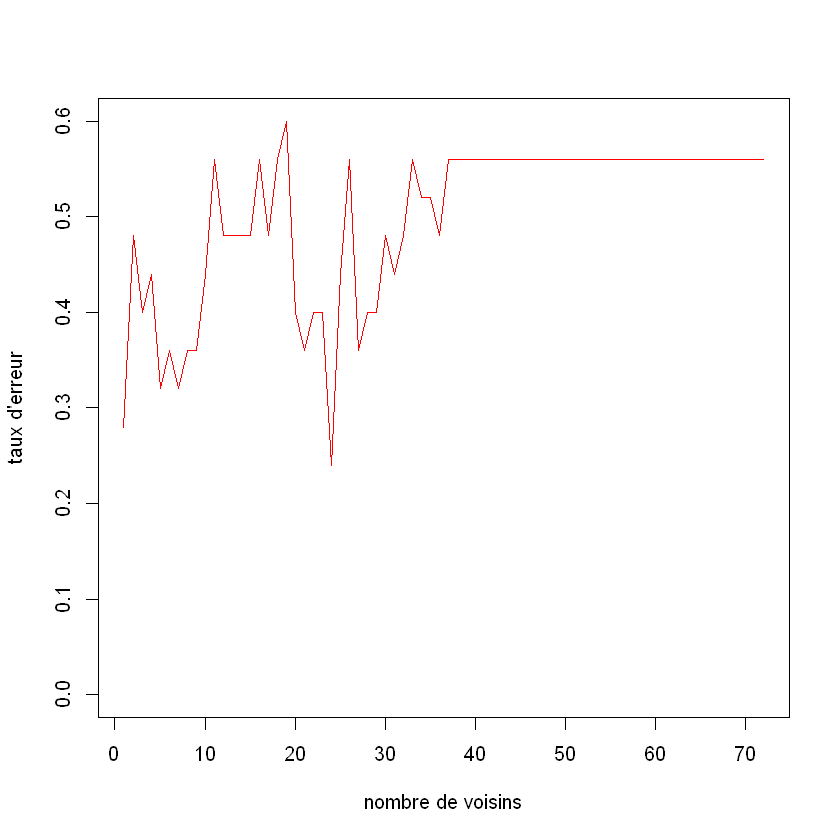

In [147]:
library(class) 
set.seed(30) 
kmax=72 
err_test <- rep(NA,kmax) 
for (k in 1:kmax) 
{ 
pred <- knn(Xtrain[,-1],Xtest[,-1],Xtrain[,1],k) 
err_test[k] <- sum(pred!=Xtest[,1])/length(Xtest[,1]) 
} 
lim <- c(0,max(err_test)) 
plot(err_test,type="l",ylim=lim,col=2,xlab="nombre de voisins", ylab= "taux d'erreur") 
which.min(err_test) 

la valeur de k qui a donné le plus petit taux d'erreur est k=24.
En regardant le graphe on remarque que quand la valeur de k dépasse n/2 le taux d'erreur reste stable et important donc vaut mieux que la valeur de k ne dépasse en aucun cas la valeur n/2.

#### Nouveau decoupage apprentissage/test 

[1] 24

[1] 1

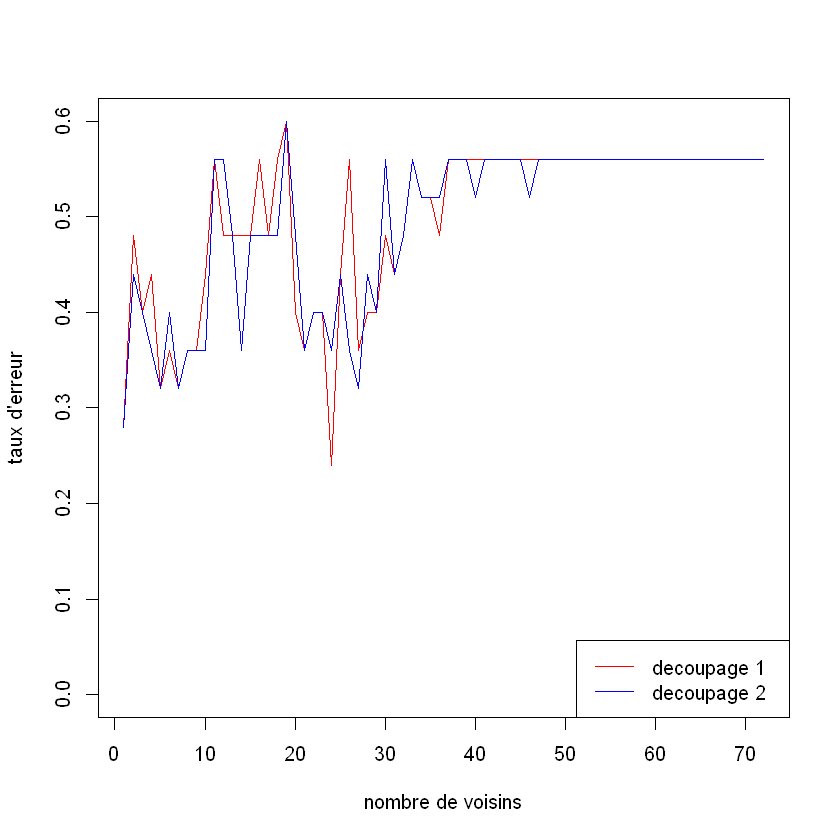

In [148]:
err_test1 <- rep(NA,kmax) 
set.seed(10) 
tr <- sample(1:nrow(X),72) 
train <- X[tr,] 
test <- X[-tr,] 
for (k in 1:kmax) 
{ 
pred <- knn(Xtrain[,-1],Xtest[,-1], Xtrain [,1],k) 
err_test1[k] <- sum(pred!=Xtest[,1])/length(Xtest[,1])
} 
plot(err_test,type="l",ylim=lim,col=2,xlab="nombre de voisins", ylab= "taux d'erreur") 
lines(err_test1,col=4) 
legend("bottomright", legend=c("decoupage 1", "decoupage 2"), lty=1, col=c(2,4))
which.min(err_test)
which.min(err_test1)


en changeant le découpage de l'échantillant on a constaté que la valeur de k à changé et le taux d'erreur minimum associé a aussi changé d'ou l'importance du découpage de l'échantillant pour le choix du k.

#### (4) Exécuter le code suivant et faire un choix pour k. 

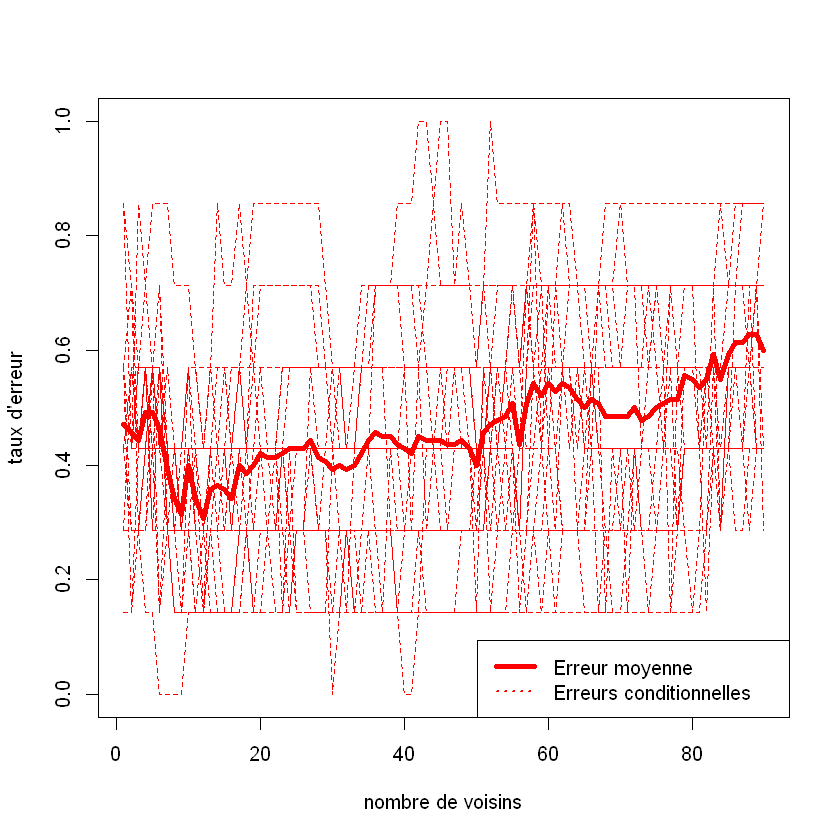

In [149]:
B<- 20
kmax <- 90
err_test <- matrix(NA,kmax,B) 
for (b in 1:B) 
{ 
tr <- sample(1:nrow(X),90) 
Xtrain <- X[tr,] 
Xtest <- X[-tr,] 
for (k in 1:kmax) 
{ 
pred <- knn(Xtrain[,-1],Xtest[,-1], Xtrain [,1],k) 
err_test[k,b] <- sum(pred!= Xtest[,1])/length(Xtest[,1]) 
}
} 
mean_err_test <- apply(err_test,1,mean) 
lim <-c(0,max(err_test)) 
matplot(err_test,type="l",lty=2,col=2,ylim=lim, xlab="nombre de voisins",ylab="taux d'erreur") 
matpoints(mean_err_test,type="l",col=2,lwd=4) 
legend("bottomright", legend=c("Erreur moyenne", "Erreurs conditionnelles"), 
lty=c(1,3),lwd=c(4,2),col=c(2,2))


#### (5) Choisir maintenant le nombre k de voisin en utilisant par validation croisée (cross validation) leave-one-out (LOO) avec la fonction knn.cv. 

[1] 12

[1] 10

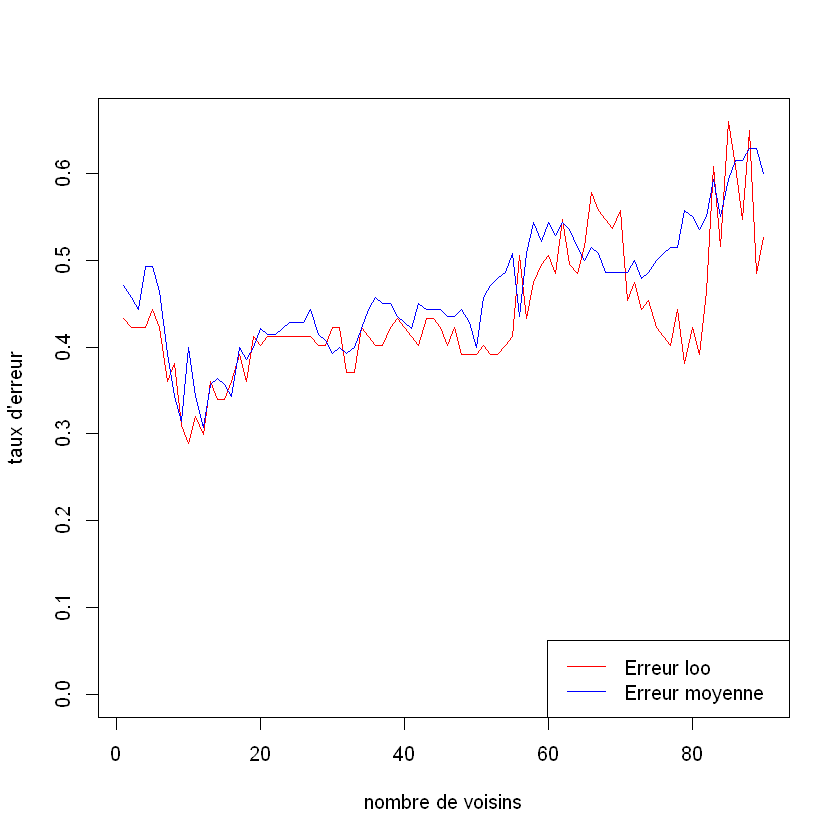

In [150]:
?knn.cv 
err_test <- rep(NA,kmax) 
for (k in 1:kmax) 
{ 
pred <- knn.cv(X[,-1], X[,1],k) 
err_test[k] <- sum(pred!= X[,1])/length(X[,1]) 
} 
lim <-c(0,max(err_test)) 
plot(err_test,type="l",col=2,ylim=lim,xlab="nombre de voisins", ylab="taux d'erreur") 
points(mean_err_test,type="l",col=4,lwd=1) 
legend("bottomright", legend=c("Erreur loo", "Erreur moyenne"), col=c(2,4),lty=1)
which.min(mean_err_test)
which.min(err_test)



#### (6) Faire un petit bilan méthodologique concernant le choix du paramètre k. 
En KNN, trouver la valeur de k n'est pas facile et Il n'y a pas de méthodes statistiques prédéfinies pour trouver la valeur la plus favorable de ce dernier, mais y en a quelques indices qu'on peut suivre pour se rapprocher à cette valeur telle que la méthode de coude(Elbow) ou bien k =sqrt(n) avec n la taille de notre échantillant.
D'une part, le choix de k dépend de la taille de l'échantillant: prenant l'exemple précédent (C.3) on remarque que si la valeur de k dépasse n/2 l'erreur reste elevée et plus que cette valeur est grande plus que notre calcule sera coûteux. Mais ça veut pas dire qu'on doit choisir une petite valeur de k car une petite valeur signifie que le bruit aura une influence plus élevée et ça peut augmenter le taux d'erreur de notre modele.
D'une autre part, le découpage de notre échantillant joue lui aussi un role important dans le choix de k et ça on peut le remarquer en regardant l'exemple (C.5) oû la méthode knn.cv nous a donné un taux d'erreur réduit parraport au découpage aléatoire ce qui va nous permettre de bien choisir k, par exemple dans notre cas la valeur optimal de k selon knn.cv est 12 mais avec un autre découpage la valeur 12 nous a donner un taux d'erreur plus elevé et là on peut voir clairement l'importance de la manière de découpage de notre échantillant.







### D. On veut maintenant non seulement choisir k mais également avoir une idée de l’erreur de prédiction de ce classifieur. Pour cela, il faut utiliser des données n’ayant jamais été utilisées. Les données doivent donc être découpées en trois parties : apprentissage/validation/test .

#### (1) Couper aléatoirement les données des deux parties : un ensemble "apprentissage-validation" (75 % des données) et un ensemble test de taille (25% des données). 

In [151]:
set.seed(30) 
tr <- sample(1:nrow(X),72) 
Xtrainval <- X[tr,] 
test <- X[-tr,]

####  (2) Utiliser la première approche pour choisir k sur l’ensemble "apprentissage-validation" : 

##### i. Choisir k en découpant les 945 données de l’ensemble "apprentissage-validation" en deux parties : une partie "apprentissage" (50% des données) et une partie "validation" (25 % des données). Choisir k qui minimise le taux d’erreur moyen sur les ensembles de validations de B = 25 découpages. 

[1] 3

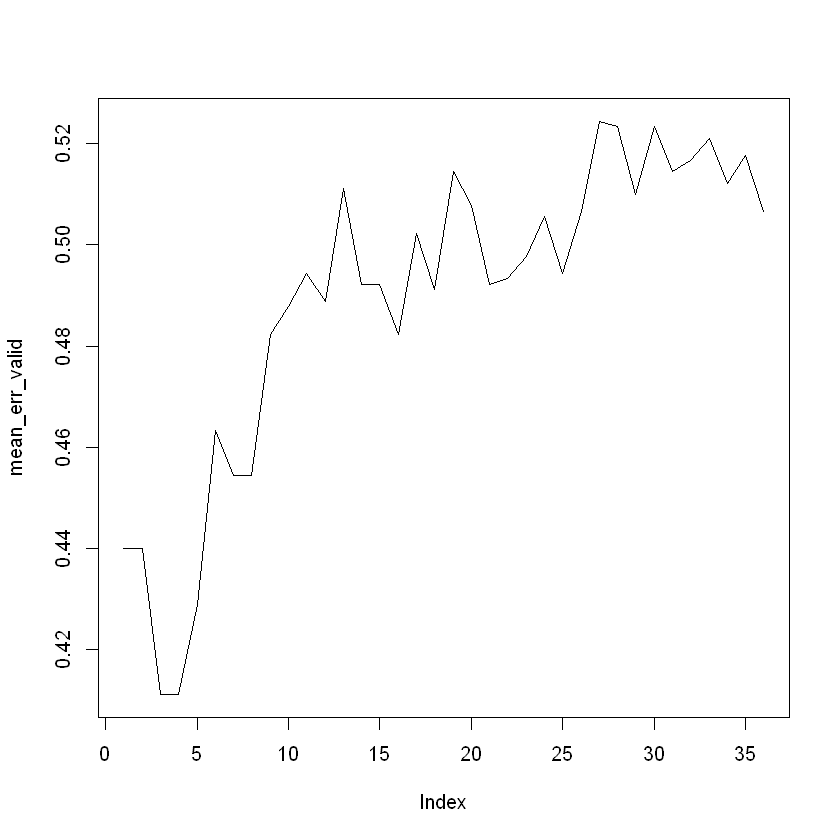

In [152]:
B <- 25 
kmax <- 36
err_valid <- matrix(NA,kmax,B) 
for (b in 1:B) { 
    tr <- sample(1:nrow(Xtrainval),36) 
    Xtrain <- Xtrainval[tr,] 
    Xvalid <- Xtrainval[-tr,] 
    for (k in 1:kmax) { 
        pred <- knn(Xtrain[,-1],Xvalid[,-1],Xtrain[,1],k) 
        err_valid[k,b] <- sum(pred!=Xvalid[,1])/length(Xvalid[,1]) 
    } 
} 
mean_err_valid <- apply(err_valid,1,mean) 
plot(mean_err_valid,type="l")
which.min(mean_err_valid)

la valeur de k qui a donné le taux d'erreur minimal est : 3

##### ii. Constuire le classifieur avec ce nombre de voisins sur l’ensemble "apprentissage-validation" et calculer le taux d’erreur des données test. 

In [153]:
pred <- knn(Xtrainval[,-1],Xtest[,-1],Xtrainval[,1],k=which.min(mean_err_valid)) 
sum(pred!=Xtest[,1])/length(Xtest[,1])

[1] 0.1428571

on s'est retrouvé avec un taux d'erreur égale à 14 %

#### (3) Utiliser la seconde approche pour choisir k par validation croisée LOO sur l’ensemble "apprentissage validation". Calculer ensuite le taux d’erreur des données test. 

In [154]:
err_valid <- rep(NA,kmax) 
for (k in 1:kmax) 
{ 
pred <- knn.cv(Xtrainval[,-1],Xtrainval[,1],k) 
err_valid[k] <- sum(pred!=Xtrainval[,1])/length(Xtrainval[,1]) 
} 
which.min(err_valid) 
pred <- knn(Xtrainval[,-1],Xtest[,-1],Xtrainval[,1],k=which.min(err_valid)) 
sum(pred!=Xtest[,1])/length(Xtest[,1])

[1] 9

[1] 0.2857143

là on remarque que la crosse validation nous a donné des resultats moins importants que la première méthode

### E. Pour les courageux, on pourrait recommencer avec plusieurs découpages des données en deux parties "apprentissage-validation" et "test". Cela permettrait d’avoir une erreur test moyenne, et une idée de sa variabilié. C’est assez rapide à faire avec la méthode de LOO pour le choix de k. 

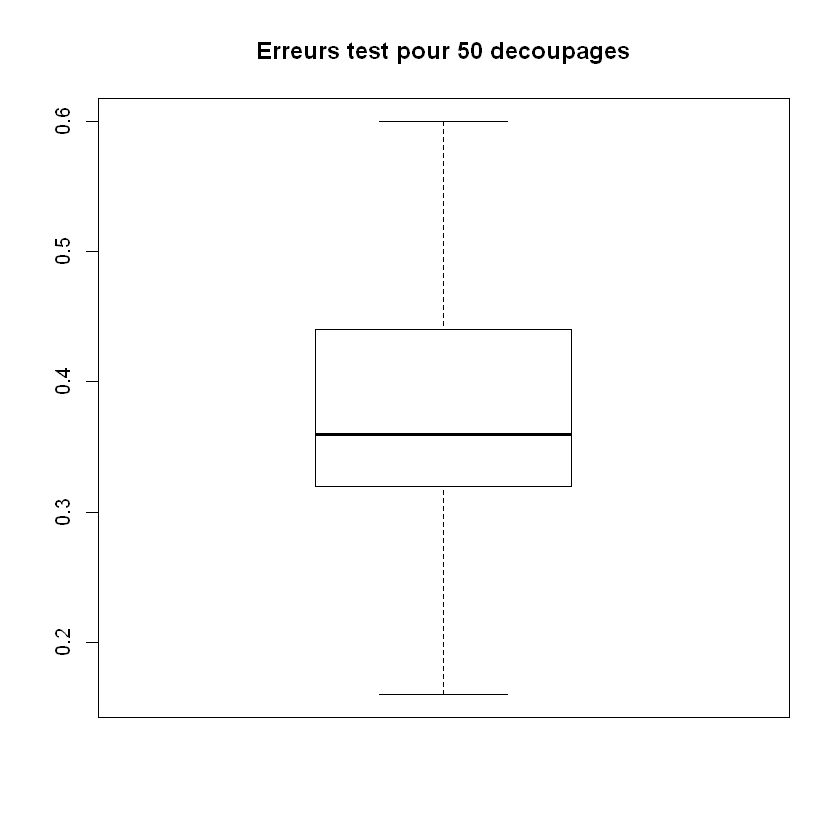

In [155]:
B <- 50 
kmax <- 50 
err_valid <- rep(NA,kmax) 
err_test <- rep(NA,B) 
for (b in 1:B) { 
    tr <- sample(1:nrow(X),72) 
    Xtrainval <- X[tr,] 
    Xtest <- X[-tr,] 
    for (k in 1:kmax) {
        pred <- knn.cv(Xtrainval[,-1],Xtrainval[,1],k) 
        err_valid[k] <- sum(pred!=Xtrainval[,1])/length(Xtrainval[,1]) 
    } 
    pred <- knn(Xtrainval[,-1],Xtest[,-1],Xtrainval[,1],k=which.min(err_valid)) 
    err_test[b] <- sum(pred!=Xtest[,1])/length(Xtest[,1]) 
} 
boxplot(err_test,main="Erreurs test pour 50 decoupages")

on constate que 50 % des valeurs sans avant la valeur 0.35. avec des valeurs extremes trés loin 

## 2.4 Bayésien naïf 

### 1. Appliquer le classifieur byésien naïf sur la table X. 


In [157]:
prostate.d<-prostate[, -c(9,10)] 

###### ensemble apprentissage 
###### Utiliser le pakcage e1071 


In [158]:
library(e1071) 
m <- naiveBayes(g ~ ., data = prostate.d) 

###### alternativement: 

In [159]:
m <- naiveBayes(prostate.d, g) 
m 
table(predict(m, prostate.d), g) 



Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = prostate.d, y = g)

A-priori probabilities:
g
     high       low 
0.4845361 0.5154639 

Conditional probabilities:
      lcavol
g           [,1]      [,2]
  high 2.0163957 0.9345935
  low  0.7236067 1.0369628

      lweight
g          [,1]      [,2]
  high 3.823771 0.4019291
  low  3.445804 0.3705293

      age
g          [,1]     [,2]
  high 65.10638 7.349162
  low  62.70000 7.418262

      lbph
g            [,1]     [,2]
  high  0.3220379 1.485922
  low  -0.1080257 1.399836

      svi
g           [,1]      [,2]
  high 0.4042553 0.4960529
  low  0.0400000 0.1979487

      lcp
g            [,1]     [,2]
  high  0.4029949 1.486868
  low  -0.7267844 1.060140

      gleason
g          [,1]      [,2]
  high 6.978723 0.6423246
  low  6.540000 0.7342913

      pgg45
g         [,1]     [,2]
  high 35.7234 27.82375
  low  13.7200 24.33779


      g
       high low
  high   31   6
  low    16  44

en lisant le tableau :
  - 6 valeurs high ont été classé low
  - 16 valeurs low ont été classé high

2. Appliquer le classifieur bayésien naïf sur la table X dérivée de la table prostate 

In [163]:
n <- naiveBayes(g ~ ., data = X[,-1])


In [164]:
X
g
n <- naiveBayes(X[,-1], g) 
n 
table(predict(n, X[,-1]), g) 


g,lcavol,lweight,age
2,-0.5798185,2.769459,50
2,-0.9942523,3.319626,58
2,-0.5108256,2.691243,74
2,-1.2039728,3.282789,58
2,0.7514161,3.432373,62
2,-1.0498221,3.228826,50
2,0.7371641,3.473518,64
2,0.6931472,3.539509,58
2,-0.7765288,3.539509,47
2,0.2231436,3.244544,63


[1] low  low  low  low  low  low  low  low  low  low  low  low  low  low  low 
[16] low  low  low  low  low  low  low  low  low  low  low  low  low  low  low 
[31] low  low  low  low  low  low  low  low  low  low  low  low  low  low  low 
[46] low  low  low  low  low  high high high high high high high high high high
[61] high high high high high high high high high high high high high high high
[76] high high high high high high high high high high high high high high high
[91] high high high high high high high
Levels: high low


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X[, -1], y = g)

A-priori probabilities:
g
     high       low 
0.4845361 0.5154639 

Conditional probabilities:
      lcavol
g           [,1]      [,2]
  high 2.0163957 0.9345935
  low  0.7236067 1.0369628

      lweight
g          [,1]      [,2]
  high 3.823771 0.4019291
  low  3.445804 0.3705293

      age
g          [,1]     [,2]
  high 65.10638 7.349162
  low  62.70000 7.418262


      g
       high low
  high   38  10
  low     9  40

en lisant le tableau :
  - 10 valeurs high ont été classé low
  - 9 valeurs low ont été classé high
accuracy = 80%
erreur = 20%
précision p = 80%

# ----------------------------3. Données Spam ---------------------------------------

Le jeu de données SPAM est une base de données e-mail, avec 4601 observations et 58 variables descriptives. 

1. Obtenir une description de la table spam (utiliser le package{kernlab} pour récupérer le jeu de données) 
2. Effectuer une première analyse statistique univariée et bivariée de la table spam 
3. Réaliser une étude comparative des méthodes de classification suivantes : régression linéaire, k plus proches voisins et le classifieur bayésien naïf sur le jeu de données spam. 
4. Refaire la même étude sur le jeu de donnée spam après normalisation (utiliser la normalisation suivante : diviser chaque case nij de la table spam par la racine carrée du produit des sommes marginale ni. Et n.j ) 
5. Faire un petit bilan concernant les méthodes utilisées et l’impact de la normalisation sur les performances de ces méthodes. 


# 1- 

In [166]:
library(kernlab)
data(spam) 

In [167]:
?spam

In [168]:
attach(spam) 

The following objects are masked from spam (pos = 4):

    address, addresses, all, business, capitalAve, capitalLong,
    capitalTotal, charDollar, charExclamation, charHash,
    charRoundbracket, charSemicolon, charSquarebracket, conference,
    credit, cs, data, direct, edu, email, font, free, george, hp, hpl,
    internet, lab, labs, mail, make, meeting, money, num000, num1999,
    num3d, num415, num650, num85, num857, order, original, our, over,
    parts, people, pm, project, re, receive, remove, report, table,
    technology, telnet, type, will, you, your



In [169]:
spam

make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.778,0.000,0.000,3.756,61,278,spam
0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.000,0.372,0.180,0.048,5.114,101,1028,spam
0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.000,0.276,0.184,0.010,9.821,485,2259,spam
0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.000,0.137,0.000,0.000,3.537,40,191,spam
0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.000,0.135,0.000,0.000,3.537,40,191,spam
0.00,0.00,0.00,0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.000,0.000,0.000,0.000,3.000,15,54,spam
0.00,0.00,0.00,0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.000,0.054,0.000,0.164,0.054,0.000,1.671,4,112,spam
0.00,0.00,0.00,0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.000,0.206,0.000,0.000,0.000,0.000,2.450,11,49,spam
0.15,0.00,0.46,0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.000,0.271,0.000,0.181,0.203,0.022,9.744,445,1257,spam
0.06,0.12,0.77,0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.040,0.030,0.000,0.244,0.081,0.000,1.729,43,749,spam


# 2- Analyse statistique univariée et bivariée

### - les dimensions de la table spam :

In [170]:
cat(" les dimensions de la table spam : ",dim(spam))

 les dimensions de la table spam :  4601 58

### - Binarisé les données SPAM : 

In [171]:
spamBin = spam
spamBin[,58] <- ifelse(spam[,58]=="spam", 1, 0)
#spamBin

### - Statistiques sur la tables SPAM : 

In [172]:
id=which(spamBin[,58]==0)
spamBinZero=spamBin[id,]
cat(" # nombre des messages non-spam : ",nrow(spamBinZero),"\n")
perZero=nrow(spamBinZero)/nrow(spamBin)
cat("les messages non-spam represent : ",perZero,"% de l'ensemble des données \n")

id=which(spamBin[,58]==1)
spamBinOne=spamBin[id,]
cat(" # nombre des messages Spam     : ",nrow(spamBinOne),"\n")
perOne=nrow(spamBinOne)/nrow(spamBin)
cat("les messages Spam represent     : ",perOne,"% de l'ensemble des données \n")

 # nombre des messages non-spam :  2788 
les messages non-spam represent :  0.6059552 % de l'ensemble des données 
 # nombre des messages Spam     :  1813 
les messages Spam represent     :  0.3940448 % de l'ensemble des données 


### - La moyenne 

In [173]:
cat("la Moyenne des spams : " , mean(spamBin[,58]),"\n")


la Moyenne des spams :  0.3940448 


### - La variance 

In [174]:
cat("la variance des spams avec la commande var : ",var(spamBin[,58]),"\n")
cat("la variance des spams avec la formule      : ",sum((spamBin[,58]-mean(spamBin[,58]))^2)/nrow(spamBin),"\n")

la variance des spams avec la commande var :  0.2388254 
la variance des spams avec la formule      :  0.2387735 


### - Summary : 

In [175]:
summary(spamBin)

      make           address            all             num3d         
 Min.   :0.0000   Min.   : 0.000   Min.   :0.0000   Min.   : 0.00000  
 1st Qu.:0.0000   1st Qu.: 0.000   1st Qu.:0.0000   1st Qu.: 0.00000  
 Median :0.0000   Median : 0.000   Median :0.0000   Median : 0.00000  
 Mean   :0.1046   Mean   : 0.213   Mean   :0.2807   Mean   : 0.06542  
 3rd Qu.:0.0000   3rd Qu.: 0.000   3rd Qu.:0.4200   3rd Qu.: 0.00000  
 Max.   :4.5400   Max.   :14.280   Max.   :5.1000   Max.   :42.81000  
      our               over            remove          internet      
 Min.   : 0.0000   Min.   :0.0000   Min.   :0.0000   Min.   : 0.0000  
 1st Qu.: 0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.: 0.0000  
 Median : 0.0000   Median :0.0000   Median :0.0000   Median : 0.0000  
 Mean   : 0.3122   Mean   :0.0959   Mean   :0.1142   Mean   : 0.1053  
 3rd Qu.: 0.3800   3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.: 0.0000  
 Max.   :10.0000   Max.   :5.8800   Max.   :7.2700   Max.   :11.1100  
     o

### - Boxplot

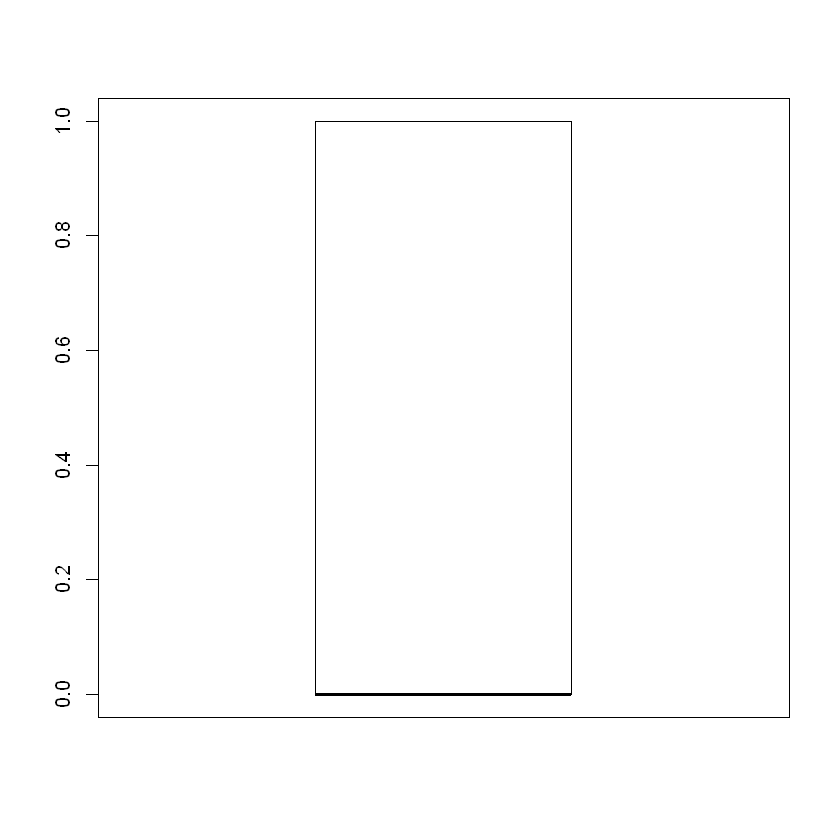

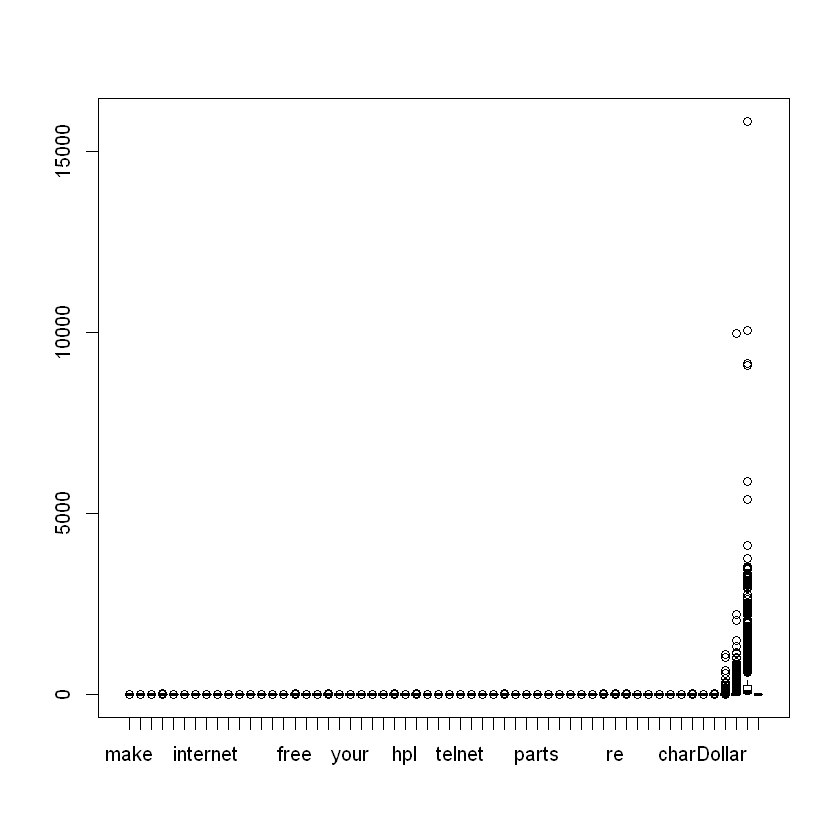

In [176]:
boxplot(spamBin[,58])
boxplot(spamBin)

### - Histogram 

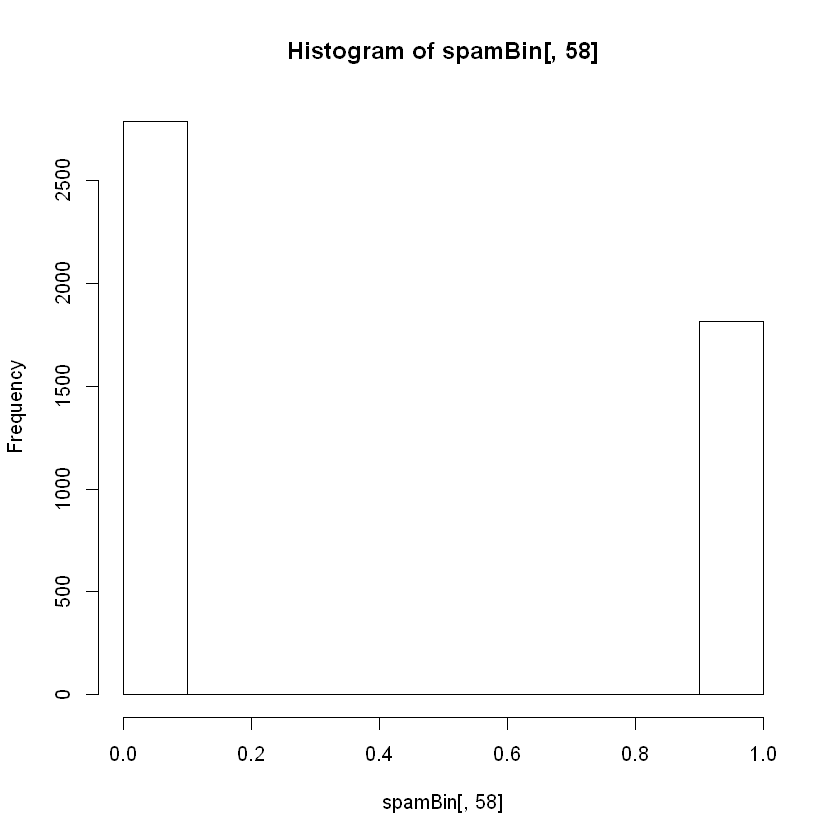

In [177]:
hist(spamBin[,58])


In [178]:
pairs(spamBin)
plot(spamBin)

ERROR: Error in plot.new(): figure margins too large


# 3 - A - REGRESSION LINEAIRE

In [179]:
lm.fit <- lm(spamBin[,58]~spamBin[,57]+spamBin[,56]+spamBin[,53]+spamBin[,7]+spamBin[,47]+spamBin[,49]+spamBin[,23]+spamBin[,6])

In [180]:
lm.beta <- lm.fit$coef 
lm.beta
sort(lm.beta)


(Intercept) spamBin[, 57] spamBin[, 56] spamBin[, 53]  spamBin[, 7] 
 0.2374842998  0.0001162121  0.0001539193  0.3725233161  0.3661613124 
spamBin[, 47] spamBin[, 49] spamBin[, 23]  spamBin[, 6] 
-0.1976811277 -0.1076805672  0.2728066556  0.2403441462

spamBin[, 47] spamBin[, 49] spamBin[, 57] spamBin[, 56]   (Intercept) 
-0.1976811277 -0.1076805672  0.0001162121  0.0001539193  0.2374842998 
 spamBin[, 6] spamBin[, 23]  spamBin[, 7] spamBin[, 53] 
 0.2403441462  0.2728066556  0.3661613124  0.3725233161

In [181]:
colnames(spam)[57]
colnames(spam)[56]
colnames(spam)[53]
colnames(spam)[7]
colnames(spam)[47]
colnames(spam)[49]
colnames(spam)[23]
colnames(spam)[6]

[1] "capitalTotal"

[1] "capitalLong"

[1] "charDollar"

[1] "remove"

[1] "table"

[1] "charSemicolon"

[1] "num000"

[1] "over"

In [182]:
g =spamBin[,58]
yhat = predict(lm.fit)
lm.ghat =factor(ifelse(yhat>0.5,1,0))
sum(lm.ghat != g)
mean(lm.ghat != g)


[1] 942

[1] 0.2047381

# 3 - B -  KNN 

In [183]:
library(class) 
kmax <- 200
err_test <- rep(NA,kmax) 
set.seed(30) 
tr <- sample(1:nrow(spamBin),3000) 

#### La table d'apprentissage :

In [184]:
X=cbind(spamBin[,58],spamBin[,57],spamBin[,56],spamBin[,53],spamBin[,7],spamBin[,47],spamBin[,49],spamBin[,23],spamBin[,6])
spamBinTrainval <- X[tr,]
cat(" La table d'apprentissage : avec dim = " ,dim(spamBinTrainval),"\n")
spamBinTrainval



 La table d'apprentissage : avec dim =  3000 9 


0,1787,185,0.000,0.00,0,0.020,0.00,0.04
0,338,115,0.059,0.00,0,0.000,0.48,0.00
1,40,5,0.000,0.00,0,0.000,0.00,0.00
1,41,14,0.000,0.41,0,0.000,0.00,0.00
1,302,23,0.123,0.81,0,0.123,0.00,0.00
0,35,11,0.000,0.00,0,0.000,0.00,0.00
1,80,38,0.000,0.00,0,0.000,0.00,0.00
0,15,4,0.000,0.00,0,0.000,0.00,0.00
1,119,22,0.459,0.64,0,0.000,0.64,0.00
0,896,47,0.016,0.00,0,0.115,0.00,0.00
1,91,32,0.000,0.46,0,0.000,0.46,0.00


#### La table Test :

In [185]:
spamBinTest <- X[-tr,]
cat(" La table du Test : avec dim = " ,dim(spamBinTest),"\n")
spamBinTest


 La table du Test : avec dim =  1601 9 


1,278,61,0.000,0.00,0,0.000,0.00,0.00
1,191,40,0.000,0.31,0,0.000,0.00,0.00
1,54,15,0.000,0.00,0,0.000,0.00,0.00
1,112,4,0.054,0.00,0,0.000,0.00,0.00
1,21,6,0.000,0.96,0,0.000,0.00,0.00
1,261,61,0.000,0.00,0,0.000,0.00,0.00
1,461,95,0.370,0.00,0,0.000,0.70,0.00
1,82,22,0.196,0.00,0,0.000,0.00,0.00
1,129,66,0.000,0.65,0,0.000,0.00,0.00
1,264,30,0.000,0.00,0,0.000,0.00,0.00
1,29,12,0.000,0.00,0,0.436,0.00,0.00


#### Prédiction :

 Le err_test Min  =  15 


[1] 0.2648345

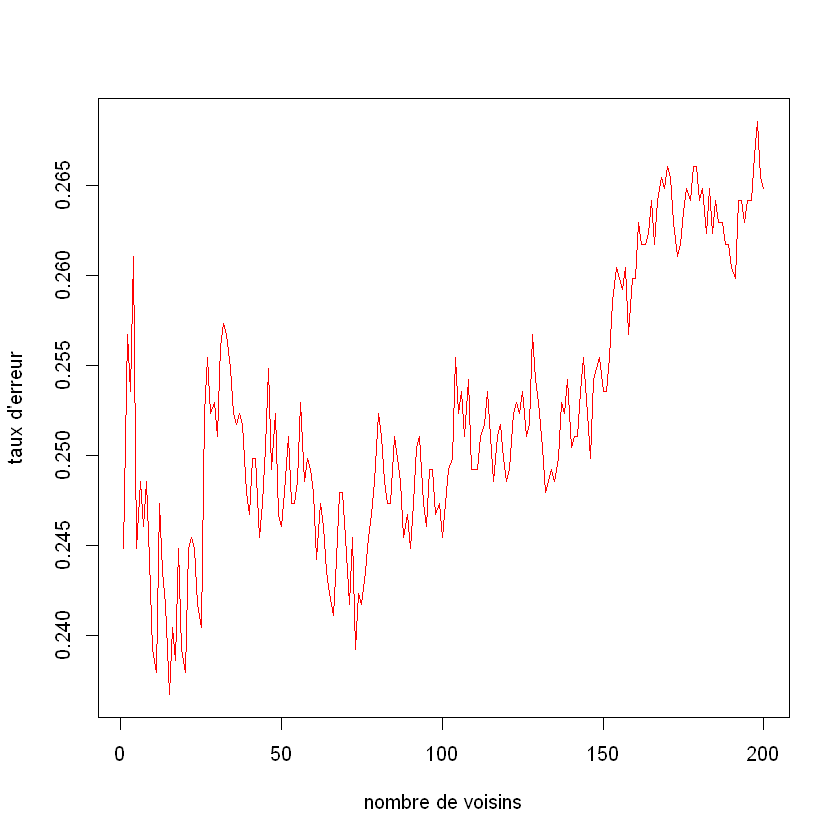

In [186]:
for (k in 1:kmax){
    pred <- knn(spamBinTrainval[,-1],spamBinTest[,-1],spamBinTrainval[,1],k) 
   err_test[k] <- sum(pred!=spamBinTest[,1])/length(spamBinTest[,1]) 
} 

plot(err_test,type="l",col=2,xlab="nombre de voisins", ylab="taux d'erreur") 
cat(" Le err_test Min  = " ,which.min(err_test) ,"\n")
err_test[k]


# 3 - C -  Classifieur bayésien naïf 

In [187]:
library(e1071)
Z <-cbind(spam[58],spam[57],spam[56],spam[53],spam[7],spam[47],spam[49],spam[23],spam[6])
Z.d = Z[,-1]
m <- naiveBayes(Z[,1] ~ ., data = Z.d)
m


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
  nonspam      spam 
0.6059552 0.3940448 

Conditional probabilities:
         capitalTotal
Y             [,1]     [,2]
  nonspam 161.4709 355.7384
  spam    470.6194 825.0812

         capitalLong
Y              [,1]      [,2]
  nonspam  18.21449  39.08479
  spam    104.39327 299.28497

         charDollar
Y               [,1]       [,2]
  nonspam 0.01164849 0.06964675
  spam    0.17447821 0.36047870

         remove
Y               [,1]      [,2]
  nonspam 0.00938307 0.1104668
  spam    0.27540541 0.5721104

         table
Y                [,1]       [,2]
  nonspam 0.008192253 0.09674926
  spam    0.001218974 0.01850968

         charSemicolon
Y               [,1]       [,2]
  nonspam 0.05028085 0.30337179
  spam    0.02057308 0.09162069

         num000
Y                [,1]       [,2]
  nonspam 0.007087518 0.06773317
  spam    0.247054606 0.51915551


In [188]:
m <- naiveBayes(Z.d,Z[,1]) 
m
table(predict(m,Z.d),Z[,1])



Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = Z.d, y = Z[, 1])

A-priori probabilities:
Z[, 1]
  nonspam      spam 
0.6059552 0.3940448 

Conditional probabilities:
         capitalTotal
Z[, 1]        [,1]     [,2]
  nonspam 161.4709 355.7384
  spam    470.6194 825.0812

         capitalLong
Z[, 1]         [,1]      [,2]
  nonspam  18.21449  39.08479
  spam    104.39327 299.28497

         charDollar
Z[, 1]          [,1]       [,2]
  nonspam 0.01164849 0.06964675
  spam    0.17447821 0.36047870

         remove
Z[, 1]          [,1]      [,2]
  nonspam 0.00938307 0.1104668
  spam    0.27540541 0.5721104

         table
Z[, 1]           [,1]       [,2]
  nonspam 0.008192253 0.09674926
  spam    0.001218974 0.01850968

         charSemicolon
Z[, 1]          [,1]       [,2]
  nonspam 0.05028085 0.30337179
  spam    0.02057308 0.09162069

         num000
Z[, 1]           [,1]       [,2]
  nonspam 0.007087518 0.06773317
  spam    0.247054606 0.51915551

      

         
          nonspam spam
  nonspam    2620  686
  spam        168 1127

# 4 - A -  REGRESSION

In [189]:
spamNormalise = spam
dim(spam)


[1] 4601   58

In [190]:
vecteurI <- c()
vecteurJ <- c()

for (i in c(1:4601)){
    k = 0 
    for (j in c(1:57)){
      k = k + spam[i,j]
    }
    vecteurI[i]=k
}
cat(" le vecteur I contient : ",length(vecteurI) ,"elements\n" )

for (j in c(1:57)){
    k = 0 
    for (i in c(1:4601)){
      k = k + spam[i,j]
    }
    vecteurJ[j]=k
}
cat(" le vecteur J contient : ",length(vecteurJ) ,"elements\n" )


 le vecteur I contient :  4601 elements
 le vecteur J contient :  57 elements


### Normalisation : 


In [191]:
for (i in c(1:4601)){
    for (j in c(1:57)){
      spamNormalise[i,j]=spam[i,j]/(sqrt(vecteurI[i]*vecteurJ[j]))
    }
}
spamNormalise
#pour verifier
#spam
#spamNormalise

make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0.000000e+00,1.092308e-03,9.516176e-04,0,0.0004511149,0.000000e+00,0.0000000000,0.000000e+00,0.0000000000,0.0000000000,...,0.000000e+00,0.000000e+00,0.000000e+00,1.181452e-03,0.000000e+00,0.000000e+00,0.0012985194,0.0066523906,0.013010670,spam
2.828396e-04,2.642064e-04,4.110290e-04,0,0.0001091152,3.937646e-04,0.0002706209,9.394747e-05,0.0000000000,0.0008366499,...,0.000000e+00,1.541732e-04,0.000000e+00,3.123198e-04,2.847064e-04,9.938764e-05,0.0009774703,0.0060896069,0.026599162,spam
5.202087e-05,0.000000e+00,3.757217e-04,0,0.0006171173,1.720036e-04,0.0001576163,1.036749e-04,0.0005978491,0.0001432390,...,1.427396e-05,1.075168e-04,0.000000e+00,1.491664e-04,1.873475e-04,1.332897e-05,0.0012083814,0.0188241376,0.037626735,spam
0.000000e+00,0.000000e+00,0.000000e+00,0,0.0010683861,0.000000e+00,0.0008692292,1.839747e-03,0.0009788100,0.0012200762,...,0.000000e+00,3.481658e-04,0.000000e+00,2.502694e-04,0.000000e+00,0.000000e+00,0.0014709857,0.0052475720,0.010753225,spam
0.000000e+00,0.000000e+00,0.000000e+00,0,0.0010683950,0.000000e+00,0.0008692363,1.839762e-03,0.0009788180,0.0012200863,...,0.000000e+00,3.430859e-04,0.000000e+00,2.466178e-04,0.000000e+00,0.000000e+00,0.0014709978,0.0052476154,0.010753314,spam
0.000000e+00,0.000000e+00,0.000000e+00,0,0.0056017818,0.000000e+00,0.0000000000,9.646196e-03,0.0000000000,0.0000000000,...,0.000000e+00,1.011899e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0022277241,0.0035136333,0.005428326,spam
0.000000e+00,0.000000e+00,0.000000e+00,0,0.0044685728,0.000000e+00,0.0000000000,0.000000e+00,0.0000000000,0.0017010078,...,0.000000e+00,1.883385e-04,0.000000e+00,4.111600e-04,2.550521e-04,0.000000e+00,0.0009537394,0.0007201755,0.008653729,spam
0.000000e+00,0.000000e+00,0.000000e+00,0,0.0060864300,0.000000e+00,0.0000000000,1.048075e-02,0.0000000000,0.0000000000,...,0.000000e+00,9.994241e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0019451655,0.0027549149,0.005266457,spam
1.646741e-04,0.000000e+00,3.082290e-04,0,0.0003875254,0.000000e+00,0.0003151204,0.000000e+00,0.0010881962,0.0005513695,...,0.000000e+00,2.579987e-04,0.000000e+00,1.238649e-04,2.617182e-04,3.713018e-05,0.0015180754,0.0218696138,0.026510830,spam
9.672829e-05,1.355339e-04,7.576603e-04,0,0.0001772524,5.386540e-04,0.0005861476,0.000000e+00,0.0001042170,0.0000000000,...,1.061647e-04,4.194088e-05,0.000000e+00,2.452041e-04,1.533526e-04,0.000000e+00,0.0003955662,0.0031032565,0.023197329,spam


In [192]:
spamBinNormalise = spamNormalise
spamBinNormalise[,58] <- ifelse(spamNormalise[,58]=="spam", 1, 0)

lm.fit <- lm(spamBinNormalise[,58]~spamBinNormalise[,57]+spamBinNormalise[,56]+spamBinNormalise[,53]+spamBinNormalise[,7]+spamBinNormalise[,47]+spamBinNormalise[,49]+spamBinNormalise[,23]+spamBinNormalise[,6]) 
lm.beta <- lm.fit$coef 
sort(lm.beta)


spamBinNormalise[, 49] spamBinNormalise[, 47]            (Intercept) 
           -20.6412130             -4.5859481              0.1060361 
spamBinNormalise[, 57]  spamBinNormalise[, 6] spamBinNormalise[, 56] 
            13.6774511             16.5089960             19.8378301 
spamBinNormalise[, 23]  spamBinNormalise[, 7] spamBinNormalise[, 53] 
            66.8333325             70.7883285             75.6419976

In [193]:
g =spamBinNormalise[,58]
yhat = predict(lm.fit)
lm.ghat =factor(ifelse(yhat>0.5,1,0))
sum(lm.ghat != g)
mean(lm.ghat != g)

[1] 948

[1] 0.2060422

# 4 - B -  KNN 

In [194]:
library(class) 
kmax <- 200
err_test <- rep(NA,kmax) 
set.seed(30) 
tr <- sample(1:nrow(spamBinNormalise),3000) 

#### La table d'apprentissage :


In [195]:
X=cbind(spamBinNormalise[,58],spamBinNormalise[,57],spamBinNormalise[,56],spamBinNormalise[,53],spamBinNormalise[,7],spamBinNormalise[,47],spamBinNormalise[,49],spamBinNormalise[,23],spamBinNormalise[,6])
spamBinNormaliseTrainval <- X[tr,]
cat(" La table d'apprentissage : avec dim = " ,dim(spamBinNormaliseTrainval),"\n")
spamBinNormaliseTrainval


 La table d'apprentissage : avec dim =  3000 9 


0,0.0351966111,0.0084906527,0.000000e+00,0.0000000000,0,3.375750e-05,0.0000000000,4.281935e-05
0,0.0136716242,0.0108391269,1.458832e-04,0.0000000000,0,0.000000e+00,0.0010249816,0.000000e+00
1,0.0048735917,0.0014195549,0.000000e+00,0.0000000000,0,0.000000e+00,0.0000000000,0.000000e+00
1,0.0044901895,0.0035727440,0.000000e+00,0.0022363095,0,0.000000e+00,0.0000000000,0.000000e+00
1,0.0144354799,0.0025617997,3.594010e-04,0.0019283086,0,5.038409e-04,0.0000000000,0.000000e+00
0,0.0039344355,0.0028813772,0.000000e+00,0.0000000000,0,0.000000e+00,0.0000000000,0.000000e+00
1,0.0060691635,0.0067176209,0.000000e+00,0.0000000000,0,0.000000e+00,0.0000000000,0.000000e+00
0,0.0025949764,0.0016124832,0.000000e+00,0.0000000000,0,0.000000e+00,0.0000000000,0.000000e+00
1,0.0083834910,0.0036115503,1.976699e-03,0.0022455625,0,0.000000e+00,0.0023802872,0.000000e+00
0,0.0254606158,0.0031120875,2.779270e-05,0.0000000000,0,2.800417e-04,0.0000000000,0.000000e+00
1,0.0069330431,0.0056810097,0.000000e+00,0.0017454506,0,0.000000e+00,0.0018501706,0.000000e+00


#### La table Test :


In [196]:
spamBinNormaliseTest <- X[-tr,] 
cat(" La table du Test : avec dim = " ,dim(spamBinNormaliseTest),"\n")
spamBinNormaliseTest


 La table du Test : avec dim =  1601 9 


1,0.013010670,0.0066523906,0.000000e+00,0.000000e+00,0,0.000000e+00,0.0000000000,0.000000e+00
1,0.010753225,0.0052475720,0.000000e+00,8.692292e-04,0,0.000000e+00,0.0000000000,0.000000e+00
1,0.005428326,0.0035136333,0.000000e+00,0.000000e+00,0,0.000000e+00,0.0000000000,0.000000e+00
1,0.008653729,0.0007201755,2.550521e-04,0.000000e+00,0,0.000000e+00,0.0000000000,0.000000e+00
1,0.002932878,0.0019526259,0.000000e+00,6.677489e-03,0,0.000000e+00,0.0000000000,0.000000e+00
1,0.012518662,0.0068177377,0.000000e+00,0.000000e+00,0,0.000000e+00,0.0000000000,0.000000e+00
1,0.016531501,0.0079383093,8.110786e-04,0.000000e+00,0,0.000000e+00,0.0013251982,0.000000e+00
1,0.006796190,0.0042488108,9.930190e-04,0.000000e+00,0,0.000000e+00,0.0000000000,0.000000e+00
1,0.007773972,0.0092680899,0.000000e+00,1.950895e-03,0,0.000000e+00,0.0000000000,0.000000e+00
1,0.013171604,0.0034877797,0.000000e+00,0.000000e+00,0,0.000000e+00,0.0000000000,0.000000e+00
1,0.003496839,0.0033717231,0.000000e+00,0.000000e+00,0,4.505346e-03,0.0000000000,0.000000e+00


#### Prédiction :


 Le err_test Min  =  15 


[1] 0.2161149

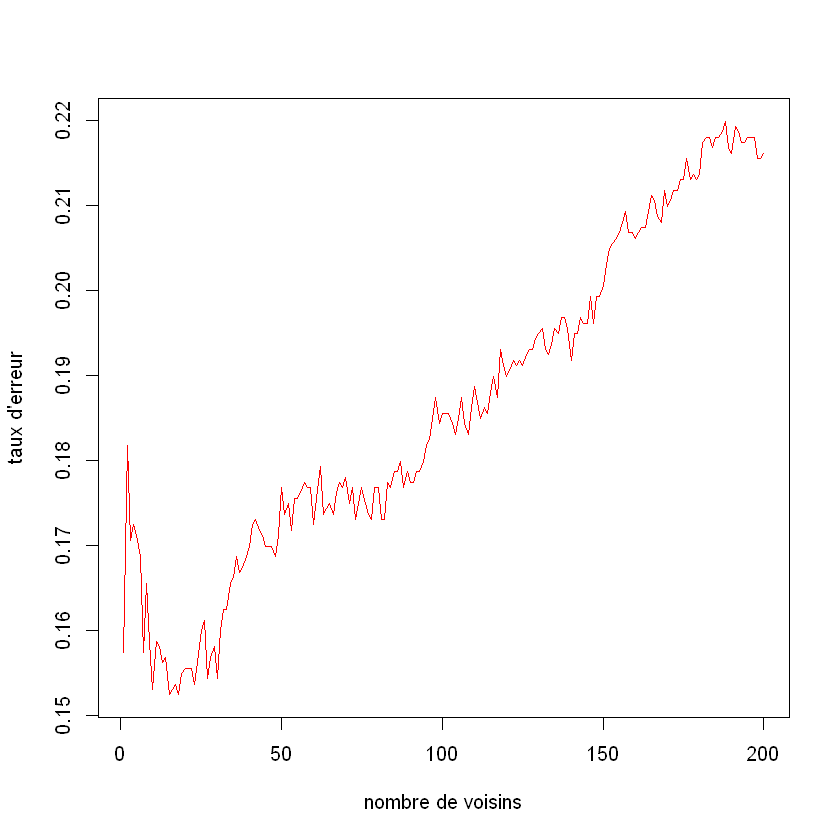

In [197]:
for (k in 1:kmax){
    pred <- knn(spamBinNormaliseTrainval[,-1],spamBinNormaliseTest[,-1],spamBinNormaliseTrainval[,1],k) 
   err_test[k] <- sum(pred!=spamBinNormaliseTest[,1])/length(spamBinNormaliseTest[,1]) 
} 

plot(err_test,type="l",col=2,xlab="nombre de voisins", ylab="taux d'erreur") 
cat(" Le err_test Min  = " ,which.min(err_test) ,"\n")
err_test[k]

# 3 - C -  Classifieur bayésien naïf 

In [198]:
library(e1071)
Z <-cbind(spam[58],spamBinNormalise[57],spamBinNormalise[56],spamBinNormalise[53],spamBinNormalise[7],spamBinNormalise[47],spamBinNormalise[49],spamBinNormalise[23],spamBinNormalise[6])
Z.d = Z[,-1]
m <- naiveBayes(Z[,1] ~ ., data = Z.d)
m


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
  nonspam      spam 
0.6059552 0.3940448 

Conditional probabilities:
         capitalTotal
Y                [,1]        [,2]
  nonspam 0.007491661 0.007192224
  spam    0.013902211 0.010148385

         capitalLong
Y                [,1]        [,2]
  nonspam 0.002596900 0.002491334
  spam    0.007098579 0.008269423

         charDollar
Y                 [,1]         [,2]
  nonspam 5.488511e-05 0.0004076857
  spam    5.298312e-04 0.0014446851

         remove
Y                 [,1]         [,2]
  nonspam 3.834981e-05 0.0005438211
  spam    9.006883e-04 0.0024577015

         table
Y                 [,1]         [,2]
  nonspam 1.617789e-04 0.0026330783
  spam    1.250127e-05 0.0002295737

         charSemicolon
Y                 [,1]         [,2]
  nonspam 2.836988e-04 0.0015772642
  spam    8.899145e-05 0.0004117731

         num000
Y                 [,1

In [199]:
m <- naiveBayes(Z.d,Z[,1]) 
m
table(predict(m,Z.d),Z[,1])


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = Z.d, y = Z[, 1])

A-priori probabilities:
Z[, 1]
  nonspam      spam 
0.6059552 0.3940448 

Conditional probabilities:
         capitalTotal
Z[, 1]           [,1]        [,2]
  nonspam 0.007491661 0.007192224
  spam    0.013902211 0.010148385

         capitalLong
Z[, 1]           [,1]        [,2]
  nonspam 0.002596900 0.002491334
  spam    0.007098579 0.008269423

         charDollar
Z[, 1]            [,1]         [,2]
  nonspam 5.488511e-05 0.0004076857
  spam    5.298312e-04 0.0014446851

         remove
Z[, 1]            [,1]         [,2]
  nonspam 3.834981e-05 0.0005438211
  spam    9.006883e-04 0.0024577015

         table
Z[, 1]            [,1]         [,2]
  nonspam 1.617789e-04 0.0026330783
  spam    1.250127e-05 0.0002295737

         charSemicolon
Z[, 1]            [,1]         [,2]
  nonspam 2.836988e-04 0.0015772642
  spam    8.899145e-05 0.0004117731

         num000
Z[, 1]            [,1]      

         
          nonspam spam
  nonspam    2498  572
  spam        290 1241

# Bilan:  

### Régression linéaire : 

Vu qu’on a plus d’une seule variable donc on est dans le cas d’une régression linéaire multiple et le problème c’est comment identifier les variables les plus importantes pour notre modèle.
	Il existe plusieurs méthodes qui aident à choisir les variables les plus pertinentes comme ‘Augmentation du R² lorsque la variable est ajoutée, en dernier, dans le modèle’ ou bien en se basant sur les ‘Coefficients de régression normalisés 
(fonction : lm.beta )’.
    On a choisi de se baser sur la méthode des coefficients normalisés en choisissant les variables qui ont les plus grands coefficients normalisés (en valeur absolue) et donc les variables choisis sont les suivantes : 'capitalTotal' 'capitalLong' 'charDollar' 'remove' 'table' 'charSemicolon' 'num000' 'over'et à la fin on s’est retrouvé avec un taux d’erreur égale à 20%. (942 valeurs mal classées)


#### Après la normalisation : 


L’objectif de la normalisation est de ramener les mesures de différentes variables sur une même échelle.
Dans le cas d’une régression linéaire avec des données normalisées on s’est retrouver avec presque le même taux d’erreur trouvé en utilisant des données non normalisées car dans le choix des variables non normalisées on a utilisé des coefficients normalisés ce qui nous a ramené au même résultat (20% taux d’erreur).

### K-plus proche voisin :

- 1) Pour appliquer cette méthode, les étapes à suivre sont les suivantes :
   - On fixe le nombre de voisins k.
   - On détecte les k-voisins les plus proches des nouvelles données d’entrée que l’on veut classer.
   - On attribue les classes correspondantes par vote majoritaire.
- 2) Mais, comment choisit-on ce paramètre k lors de l’implémentation de l’algorithme ?
   - On fait varier k
   - Pour chaque valeur de k, on calcule le taux d’erreur de l’ensemble de test
   - On garde le paramètre k qui minimise ce taux d’erreur test. 

Pour ne pas compliquer notre modèle on a choisi les mêmes 8 variables (les plus pertinentes) choisies dans la régression linéaire, après avoir appliqué l’algorithme de choix de paramètre k on a trouvé un taux d’erreur minimal égale à 26% pour un k=15.


#### Après la normalisation : 

Comme on a cité précédemment l’objectif de la normalisation est de ramener les mesures de différentes variables sur une même échelle et donc diminuer le taux d’erreur de notre modèle et c’est exactement ce qu’on a trouvé, un taux d’erreur minimale égale à 21% pour un k=15.


### Classifieur bayésien naïf : 

Le classificateur bayésien naïf est une méthode d’apprentissage supervisé qui repose sur une hypothèse simplificatrice forte : les descripteurs (Xj) sont deux à deux indépendants conditionnellement aux valeurs de la variable à prédire (Y). Pourtant, malgré cela, il se révèle robuste et efficace. Ses performances sont comparables aux autres techniques d’apprentissage.

L’un des points fort de cette méthode est la dissociation des lois de probabilités conditionnelles de classe entre les différentes caractéristiques qui aboutit au fait que chaque loi de probabilité peut être estimée indépendamment en tant que loi de probabilité à une dimension. Cela permet d'éviter nombre de problèmes venant du fléau de la dimension.

Le classificateur classifie correctement du moment que la classe adéquate est plus probable que toutes les autres. Par conséquent les probabilités de classe n'ont pas à être estimées de façon très précises, donc le classificateur dans l'ensemble est suffisamment robuste pour ne pas tenir compte de sérieux défauts dans son modèle de base de probabilités naïves.

Dans notre cas comme pour les deux méthodes précédentes on a choisi les mêmes huit variables les plus pertinentes. On a trouvé un taux d’accuracy égale à 81% et donc une erreur e= (100-81) % = 19%


#### Après la normalisation :

- On a trouvé quasiment la même accuracy et donc la même erreur mais la différence est dans :
  - Les adresses mail non spam classé spam 686 avant la normalisation et 572 après
  - Les adresses mail spam classé non spam 186 avant la normalisation et 290 après
- On a constaté aussi que le taux de précision a augmenté de 62% à 68% après avoir normalisé les données. 


### Conclusion :

- On sait très bien que comparer des méthodes en terme de taux d’erreur sur l’échantillon d’apprentissage ayant servi à estimer les paramètres favorisera toujours les méthodes les plus complexes et donc c’est pour ça on a utilisé les mêmes variables dans toutes les méthodes appliquées on peut classer les méthodes en se basant sur nous le plus petit taux d’erreur comme ça :

  - 1) bayésien naïf (19%)
  - 2) régression linéaire (20%)
  - 3) knn (21%)
- Mais classer les méthodes on se basant sur le taux d’erreur reste toujours pas suffisant vu que la complexité diffère d’une méthode à l’autre. 
